In [65]:
import sys
import os
import time
import random
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from PIL import Image

In [66]:
tf.reset_default_graph()
SIZE = 1280
WIDTH = 32
HEIGHT = 40
NUM_CLASSES = 6
iterations = 300
  
SAVER_DIR = "train-saver/province/"
  
PROVINCES = ("京","闽","粤","苏","沪","浙")
nProvinceIndex = 0
  
time_begin = time.time()

In [67]:
# 定义输入节点，对应于图片像素值矩阵集合和图片标签(即所代表的数字)
x = tf.placeholder(tf.float32, shape=[None, SIZE])
y_ = tf.placeholder(tf.float32, shape=[None, NUM_CLASSES])
  
x_image = tf.reshape(x, [-1, WIDTH, HEIGHT, 1])

In [68]:
# 定义卷积函数
def conv_layer(inputs, W, b, conv_strides, kernel_size, pool_strides, padding):
    L1_conv = tf.nn.conv2d(inputs, W, strides=conv_strides, padding=padding)
    L1_relu = tf.nn.relu(L1_conv + b)
    return tf.nn.max_pool(L1_relu, ksize=kernel_size, strides=pool_strides, padding='SAME')
  
# 定义全连接层函数
def full_connect(inputs, W, b):
    return tf.nn.relu(tf.matmul(inputs, W) + b)

In [69]:
if __name__ =='__main__' :
  # 第一次遍历图片目录是为了获取图片总数
    input_count = 0
    for i in range(0,NUM_CLASSES):
        dir = './car-datasets/tf_car_license_dataset/train_images/training-set/chinese-characters/%s/' % i #这里可以改成你自己的图片目录，i为分类标签
        for rt, dirs, files in os.walk(dir):
            for filename in files:
                input_count += 1  
  # 定义对应维数和各维长度的数组
    input_images = np.array([[0]*SIZE for i in range(input_count)])
    input_labels = np.array([[0]*NUM_CLASSES for i in range(input_count)])
    # 第二次遍历图片目录是为了生成图片数据和标签
    index = 0
    for i in range(0,NUM_CLASSES):
        dir = './car-datasets/tf_car_license_dataset/train_images/training-set/chinese-characters/%s/' % i     # 这里可以改成你自己的图片目录，i为分类标签
        for rt, dirs, files in os.walk(dir):
            for filename in files:
                filename = dir + filename
                img = Image.open(filename)
                width = img.size[0]
                height = img.size[1]
                for h in range(0, height):
                    for w in range(0, width):
                    # 通过这样的处理，使数字的线条变细，有利于提高识别准确率
                        if img.getpixel((w, h)) > 150:
                            input_images[index][w+h*width] = 0
                        else:
                            input_images[index][w+h*width] = 1
                input_labels[index][i] = 1
                index += 1
#             print(input_labels[index-1])
#     print(input_images.shape)
    
    # 第一次遍历图片目录是为了获取图片总数
    val_count = 0
    for i in range(0,NUM_CLASSES):
        dir = './car-datasets/tf_car_license_dataset/train_images/validation-set/chinese-characters/%s/' % i #这里可以改成你自己的图片目录，i为分类标签
        for rt, dirs, files in os.walk(dir):
            for filename in files:
                val_count += 1  
  # 定义对应维数和各维长度的数组
    val_images = np.array([[0]*SIZE for i in range(val_count)])
    val_labels = np.array([[0]*NUM_CLASSES for i in range(val_count)])
    # 第二次遍历图片目录是为了生成图片数据和标签
    index = 0
    for i in range(0,NUM_CLASSES):
        dir = './car-datasets/tf_car_license_dataset/train_images/validation-set/chinese-characters/%s/' % i     # 这里可以改成你自己的图片目录，i为分类标签
        for rt, dirs, files in os.walk(dir):
            for filename in files:
                filename = dir + filename
                img = Image.open(filename)
                width = img.size[0]
                height = img.size[1]
                for h in range(0, height):
                    for w in range(0, width):
                    # 通过这样的处理，使数字的线条变细，有利于提高识别准确率
                        if img.getpixel((w, h)) > 150:
                            val_images[index][w+h*width] = 0
                        else:
                            val_images[index][w+h*width] = 1
                val_labels[index][i] = 1
                index += 1
    print(val_images.shape)
    print(input_images.shape)

(32, 1280)
(1254, 1280)


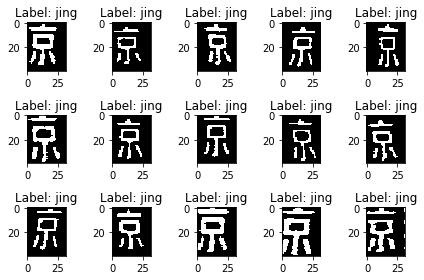

In [70]:

for i in range(0,15,1):
    num=random.randint(0,179)
    image=input_images[num].reshape(40,32)
    lable='jing'
    plt.subplot(3,5,i+1) # 绘制前15个手写体数字，以3行6列子图形式展示
    plt.tight_layout() # 自动适配
    plt.imshow(image, cmap='Greys') # 使用灰色显示像素灰度值
    plt.title("Label: {}".format(lable)) # 设置标签为子图标题

In [71]:
# tf.reset_default_graph()
with tf.Session() as sess:
    
    
    # 第一个卷积层
    W_conv1 = tf.Variable(tf.truncated_normal([8, 8, 1, 16], stddev=0.1), name="W_conv1")
    b_conv1 = tf.Variable(tf.constant(0.1, shape=[16]), name="b_conv1")
    conv_strides = [1, 1, 1, 1]
    kernel_size = [1, 2, 2, 1]
    pool_strides = [1, 2, 2, 1]
    L1_pool = conv_layer(x_image, W_conv1, b_conv1, conv_strides, kernel_size, pool_strides, padding='SAME')
    
    # 第二个卷积层
    W_conv2 = tf.Variable(tf.truncated_normal([5, 5, 16, 32], stddev=0.1), name="W_conv2")
    b_conv2 = tf.Variable(tf.constant(0.1, shape=[32]), name="b_conv2")
    conv_strides = [1, 1, 1, 1]
    kernel_size = [1, 1, 1, 1]
    pool_strides = [1, 1, 1, 1]
    L2_pool = conv_layer(L1_pool, W_conv2, b_conv2, conv_strides, kernel_size, pool_strides, padding='SAME')
    
    # 全连接层
    W_fc1 = tf.Variable(tf.truncated_normal([16 * 20 * 32, 512], stddev=0.1), name="W_fc1")
    b_fc1 = tf.Variable(tf.constant(0.1, shape=[512]), name="b_fc1")
    h_pool2_flat = tf.reshape(L2_pool, [-1, 16 * 20*32])
    h_fc1 = full_connect(h_pool2_flat, W_fc1, b_fc1)
    
    # dropout
    keep_prob = tf.placeholder(tf.float32)
    h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)  
    
    # readout层
    W_fc2 = tf.Variable(tf.truncated_normal([512, NUM_CLASSES], stddev=0.1), name="W_fc2")
    b_fc2 = tf.Variable(tf.constant(0.1, shape=[NUM_CLASSES]), name="b_fc2")
  
    # 定义优化器和训练op
    y_conv = tf.matmul(h_fc1_drop, W_fc2) + b_fc2
    cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y_conv))
    train_step = tf.train.AdamOptimizer((1e-4)).minimize(cross_entropy)
  
    correct_prediction = tf.equal(tf.argmax(y_conv, 1), tf.argmax(y_, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
     # 初始化saver
    saver = tf.train.Saver()
  
    sess.run(tf.global_variables_initializer())
  
    time_elapsed = time.time() - time_begin
    print("读取图片文件耗费时间：%d秒" % time_elapsed)
    time_begin = time.time()
  
    print ("一共读取了 %s 个训练图像， %s 个标签" % (input_count, input_count))
  
    # 设置每次训练op的输入个数和迭代次数，这里为了支持任意图片总数，定义了一个余数remainder，譬如，如果每次训练op的输入个数为60，图片总数为150张，则前面两次各输入60张，最后一次输入30张（余数30）
    batch_size = 60
    iterations = iterations
    batches_count = int(input_count / batch_size)
    remainder = input_count % batch_size
    print ("训练数据集分成 %s 批, 前面每批 %s 个数据，最后一批 %s 个数据" % (batches_count+1, batch_size, remainder))
  
    # 执行训练迭代
    for it in range(iterations):
        # 这里的关键是要把输入数组转为np.array
        for n in range(batches_count):
            train_step.run(feed_dict={x: input_images[n*batch_size:(n+1)*batch_size], y_: input_labels[n*batch_size:(n+1)*batch_size], keep_prob: 0.5})
        if remainder > 0:
            start_index = batches_count * batch_size;
        train_step.run(feed_dict={x: input_images[start_index:input_count-1], y_: input_labels[start_index:input_count-1], keep_prob: 0.5})
  
      # 每完成五次迭代，判断准确度是否已达到100%，达到则退出迭代循环
        iterate_accuracy = 0
        if it%5 == 0:
            iterate_accuracy = accuracy.eval(feed_dict={x: val_images, y_: val_labels, keep_prob: 1.0})
            print ('第 %d 次训练迭代: 准确率 %0.5f%%' % (it, iterate_accuracy*100))
            if iterate_accuracy >= 0.9999 :
                break;
  
    print ('完成训练!')
    time_elapsed = time.time() - time_begin
    print ("训练耗费时间：%d秒" % time_elapsed)
    time_begin = time.time()
  
    # 保存训练结果
    if not os.path.exists(SAVER_DIR):
        print ('不存在训练数据保存目录，现在创建保存目录')
        os.makedirs(SAVER_DIR)
    saver_path = saver.save(sess, "%smodel.ckpt"%(SAVER_DIR))

读取图片文件耗费时间：13秒
一共读取了 1254 个训练图像， 1254 个标签
训练数据集分成 21 批, 前面每批 60 个数据，最后一批 54 个数据
第 0 次训练迭代: 准确率 25.00000%
第 5 次训练迭代: 准确率 87.50000%
第 10 次训练迭代: 准确率 96.87500%
第 15 次训练迭代: 准确率 96.87500%
第 20 次训练迭代: 准确率 100.00000%
完成训练!
训练耗费时间：133秒


In [72]:
def show_img(img,name):
    plt.imshow(img) # 使用灰色显示像素灰度值
    plt.title("Label: {}".format(name)) # 设置标签为子图标题

In [84]:
if __name__ =='__main__' :
    saver = tf.train.import_meta_graph("%smodel.ckpt.meta"%(SAVER_DIR))
    with tf.Session() as sess:
        model_file=tf.train.latest_checkpoint(SAVER_DIR)
        saver.restore(sess, model_file)

        # 第一个卷积层
        W_conv1 = sess.graph.get_tensor_by_name("W_conv1:0")
        b_conv1 = sess.graph.get_tensor_by_name("b_conv1:0")
        print(W_conv1)
        print(sess.run(b_conv1))
#         conv_strides = [1, 1, 1, 1]
#         kernel_size = [1, 2, 2, 1]
#         pool_strides = [1, 2, 2, 1]
#         print(W_conv1)
#         L1_pool = conv_layer(x_image, W_conv1, b_conv1, conv_strides, kernel_size, pool_strides, padding='SAME')

#         # 第二个卷积层
#         W_conv2 = sess.graph.get_tensor_by_name("W_conv2:0")
#         b_conv2 = sess.graph.get_tensor_by_name("b_conv2:0")
#         conv_strides = [1, 1, 1, 1]
#         kernel_size = [1, 1, 1, 1]
#         pool_strides = [1, 1, 1, 1]
#         L2_pool = conv_layer(L1_pool, W_conv2, b_conv2, conv_strides, kernel_size, pool_strides, padding='SAME')

#         # 全连接层
#         W_fc1 = sess.graph.get_tensor_by_name("W_fc1:0")
#         b_fc1 = sess.graph.get_tensor_by_name("b_fc1:0")
#         h_pool2_flat = tf.reshape(L2_pool, [-1, 16 * 20*32])
#         h_fc1 = full_connect(h_pool2_flat, W_fc1, b_fc1)


#         # dropout
#         keep_prob = tf.placeholder(tf.float32)
#         h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)


#         # readout层
#         W_fc2 = sess.graph.get_tensor_by_name("W_fc2:0")
#         b_fc2 = sess.graph.get_tensor_by_name("b_fc2:0")

#         # 定义优化器和训练op
#         conv = tf.nn.softmax(tf.matmul(h_fc1_drop, W_fc2) + b_fc2)
        
#         for n in range(1,5):
#             plt.subplot(1,5,n)
#             path = "test_images/%s.bmp" % (n)
#             img = Image.open(path)
#             show_img(img,n)
#             width = img.size[0]
#             height = img.size[1]
#             img_data = [[0]*SIZE for i in range(1)]
#             for h in range(0, height):
#                 for w in range(0, width):
#                     if img.getpixel((w, h)) < 190:
#                         img_data[0][w+h*width] = 1
#                     else:
#                         img_data[0][w+h*width] = 0

#             result = sess.run(conv, feed_dict = {x: np.array(img_data), keep_prob: 1.0})
#             print(result)
#             max1 = 0
#             max2 = 0
#             max3 = 0
#             max1_index = 0
#             max2_index = 0
#             max3_index = 0
#             for j in range(NUM_CLASSES):
#                 if result[0][j] > max1:
#                     max1 = result[0][j]
#                     max1_index = j
#                     continue
#                 if (result[0][j]>max2) and (result[0][j]<=max1):
#                     max2 = result[0][j]
#                     max2_index = j
#                     continue
#                 if (result[0][j]>max3) and (result[0][j]<=max2):
#                     max3 = result[0][j]
#                     max3_index = j
#                     continue

#                 nProvinceIndex = max1_index
#             print ("概率： [%s %0.2f%%]  [%s %0.2f%%]  [%s %0.2f%%]" % (PROVINCES[max1_index],max1*100, PROVINCES[max2_index],max2*100, PROVINCES[max3_index],max3*100))

#             print ("省份简称是: %s" % PROVINCES[nProvinceIndex])

INFO:tensorflow:Restoring parameters from train-saver/province/model.ckpt
Tensor("W_conv1:0", shape=(8, 8, 1, 16), dtype=float32_ref)
[0.09654764 0.10056185 0.10121624 0.09151614 0.10014786 0.09379771
 0.10646541 0.09913025 0.09507077 0.10332154 0.09188414 0.09592735
 0.09282023 0.09430784 0.09761921 0.1002103 ]
